# VISUALIZACIÓN

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib.gridspec import GridSpec
import plotly as py
import plotly.graph_objs as go

### Con nuestros dos DataFrames limpios, nos planteamos las dudas que nuestro cliente necesita resolver.

In [175]:
df_social = pd.read_csv('../Datos/df-social-limpio.csv', index_col=0)
df_social.head()

,genero,edad,pais,nivel de estudios,puesto de trabajo,sector,tamaño de la compañia,continente,rama
0,Man,50-54,Indonesia,Master’s degree,Program/Project Manager,Manufacturing/Fabrication,"1000-9,999 employees",Asia,other
1,Man,22-24,Pakistan,Master’s degree,Software Engineer,Academics/Education,"1000-9,999 employees",Asia,developer
2,Man,45-49,Mexico,Doctoral degree,Research Scientist,Academics/Education,"1000-9,999 employees",América del Sur,data
6,Man,30-34,India,Bachelor’s degree,Data Scientist,Computers/Technology,"10,000 or more employees",Asia,data
12,Man,45-49,Nigeria,Master’s degree,Program/Project Manager,Shipping/Transportation,"1000-9,999 employees",África,other


In [176]:
df_tecnico = pd.read_csv('../Datos/df-tecnico-limpio.csv', index_col=0)
df_tecnico.head()

,edad,pais,nivel de estudios,sector,años de experiencia,años de experiencia en ML,continente,Python,C++,SQL,MATLAB,Other,C,Java,Javascript,R,Swift,Bash,Julia
0,25-29,Poland,Master’s degree,Computers/Technology,3-5 years,Under 1 year,Europa,NaN,Utilizado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Viet Nam,Master’s degree,Academics/Education,1-3 years,1-2 years,Asia,Utilizado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22-24,Morocco,Master’s degree,Computers/Technology,1-3 years,Under 1 year,África,NaN,NaN,NaN,NaN,Utilizado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18-21,Bangladesh,Bachelor’s degree,Non-profit/Service,under 1 years,Under 1 year,Asia,Utilizado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18-21,India,Bachelor’s degree,Academics/Education,1-3 years,Under 1 year,Asia,NaN,Utilizado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


¿Qué relación hay entre el sector, el tamaño de la compañía y el género?

¿Qué relación hay entre la edad y el puesto de trabajo, sólo en mujeres?

Podríamos añadir el tema del sector.

Querríamos saber el rango de edad de mujeres en el sector tech para ver por dónde tendrían que enfocarse los cursos.

(ej. Cursos para mujeres +40 que quieran cambiar de sector)

Preguntas Técnico

¿Qué relación hay los años de experiencia y el tiempo que llevan trabajando en ML? NO RESULTADOS CONCLUYENTES

¿Qué relación hay entre el continente y el lenguaje que utilizan para trabajar? OK

¿Qué relación hay entre la edad, los años de experiencia y el lenguaje que mas usan? NO RESULTADOS CONCLUYENTES

Querríamos saber cuántas mujeres en ML hay en cada continente, enfocado a los cursos.

¿Qué diferencia de género hay entre continentes, en posiciones de Data y de Programación?

In [177]:
df_continente = df_social[df_social["rama"].isin(["data","developer"])]

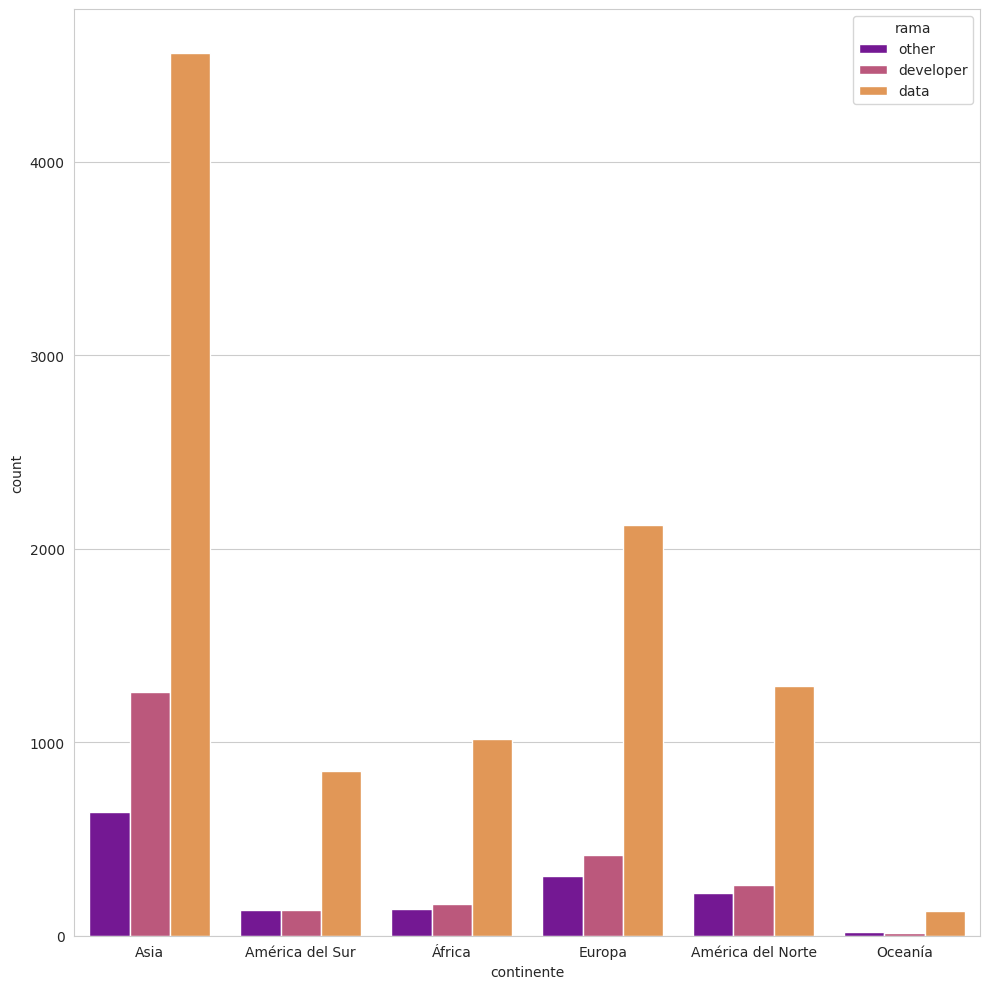

In [178]:
plt.figure(figsize=(10,10))

fig = sns.countplot(x = df_social["continente"],hue = df_social["rama"],  palette = 'plasma')
plt.tight_layout()

plt.show()

### ¿Qué relación hay entre las ramas developer-data y el género?

En esta gráfica podemos ver en el eje de las x los distintos continentes y en el eje y el número de encuestados. Lo que observamos es que para todos los continentes la rama del data analytic predomina sobre la rama developer. 
 

### GRAFICA RELACION RAMA-CONTINENTE (DUDA)

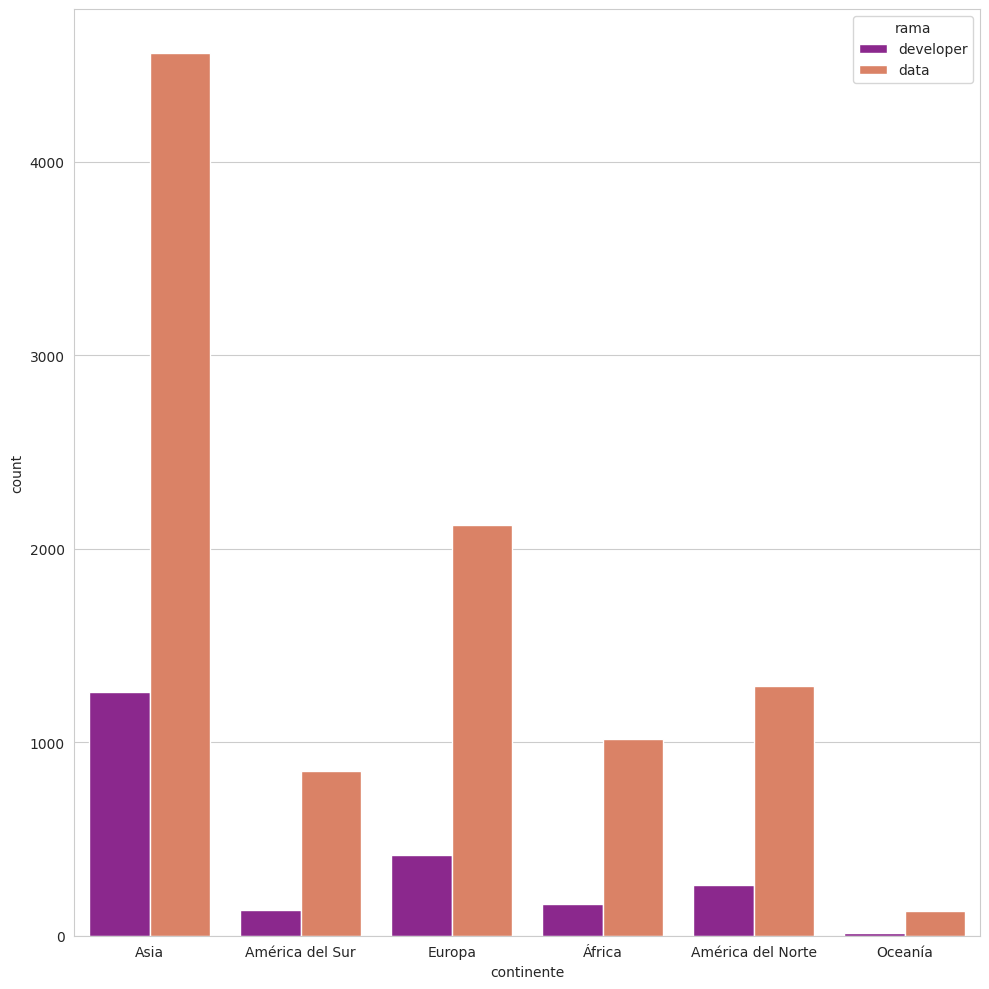

In [179]:
plt.figure(figsize=(10,10))

fig = sns.countplot(x = df_continente["continente"], hue = df_continente["rama"], palette = 'plasma')
plt.tight_layout()

plt.show()

In [180]:
df_asia = df_social[df_social["continente"].isin(["Asia"])]

In [181]:
df_asia2 = df_social[df_social["pais"].isin(["India", "Japan", "China", "Pakistan"])]

In [182]:
import sidetable

### GRÁFICA INDIA (USAR)

Antes de nada analizaremos el caso de Asia donde hemos apreciado en las gráficas un valor predominante frente a los demás continentes. Esto se debe principalmente por la India, uno de los países con mayor número de trabajadores en el sector tecnológico. 

Con este pie_char sacado de los 4 países asiáticos con mayor número de trabajadores en tec que predomina claramente la India con un 73%, es decir, casi un 80% de los datos analizados en el continente asiático vienen de la India.

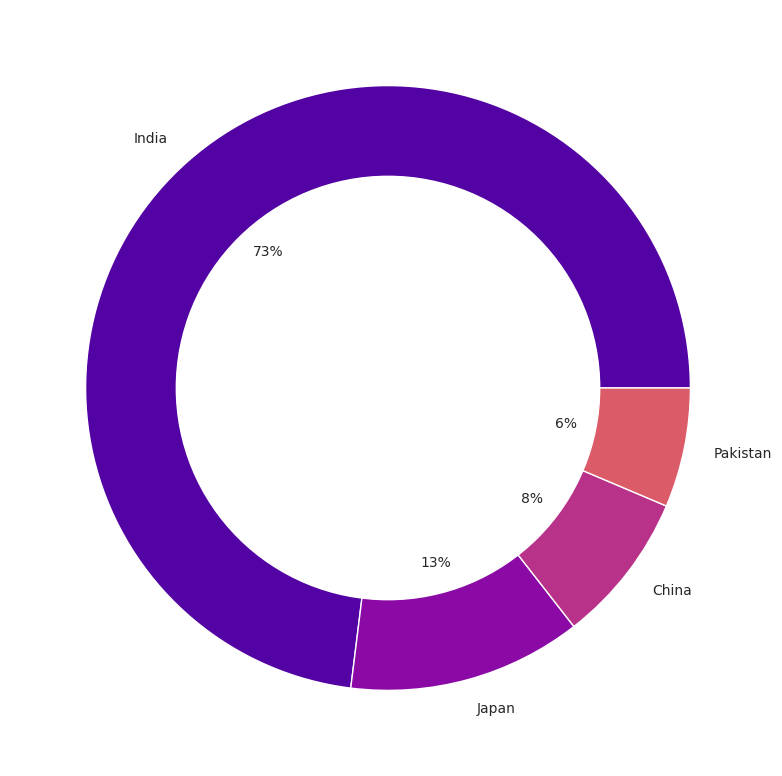

In [183]:
plt.figure(figsize=(8,8))

color = sns.color_palette('plasma')

plt.pie(labels = df_asia2["pais"].value_counts().keys(), x= df_asia2["pais"].value_counts().values, autopct="%1.0f%%", colors = color)

circulo = plt.Circle((0,0), 0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo)



plt.tight_layout()
plt.show()

### ¿Qué relación hay entre el nivel de estudios y el continente dónde residen?

En estas gráficas podemos ver en el eje de las x por un lado las ramas(data y developer) y por otro lado los distintos continentes y en el eje y un conteo del nivel de estudios de los encuestados. 

Lo que observamos en la primera gráfica es que está relacionado tener estudios superiores para trabajar en las dos ramas (vemos claramente que predominan los estudios de doctorado y master para las dos). A raíz de este análisis podemos observar en la segunda gráfica que el nivel de estudios superiores predomina en los continentes Europa, Asia y Amercia del Norte. Este hecho se da por la alfabetización y desarrollo que tienen estos tres continentes frente a los demás.

In [248]:
df_continente.head()

,genero,edad,pais,nivel de estudios,puesto de trabajo,sector,tamaño de la compañia,continente,rama
1,Man,22-24,Pakistan,Master’s degree,Software Engineer,Academics/Education,"1000-9,999 employees",Asia,developer
2,Man,45-49,Mexico,Doctoral degree,Research Scientist,Academics/Education,"1000-9,999 employees",América del Sur,data
6,Man,30-34,India,Bachelor’s degree,Data Scientist,Computers/Technology,"10,000 or more employees",Asia,data
14,Man,35-39,Greece,Doctoral degree,Research Scientist,Academics/Education,50-249 employees,Europa,data
15,Man,50-54,Belgium,Bachelor’s degree,Data Analyst,Energy/Mining,"1000-9,999 employees",Europa,data


### GRÁFICA RAMA-CONTINENTE CON NIVEL DE ESTUDIOS (USAR)

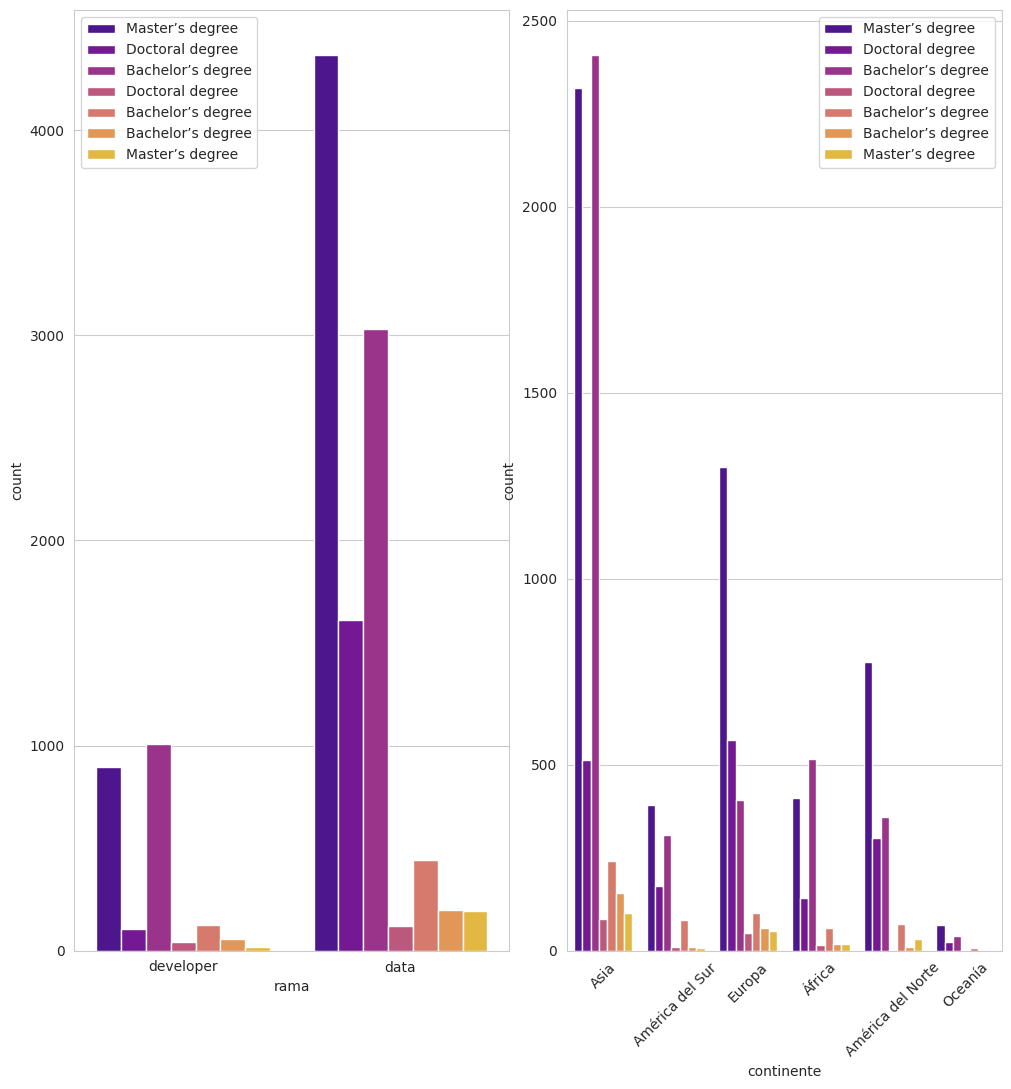

In [184]:
# Gráfico para los dos géneros
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
axes=axes.flat
fig.tight_layout()

for i, col in enumerate(["rama", "continente"]):
    sns.countplot(data=df_continente, x=df_continente[col], hue="nivel de estudios", palette="plasma", ax=axes[i])
    axes[i].legend(df_continente["nivel de estudios"])
plt.xticks(rotation=45);

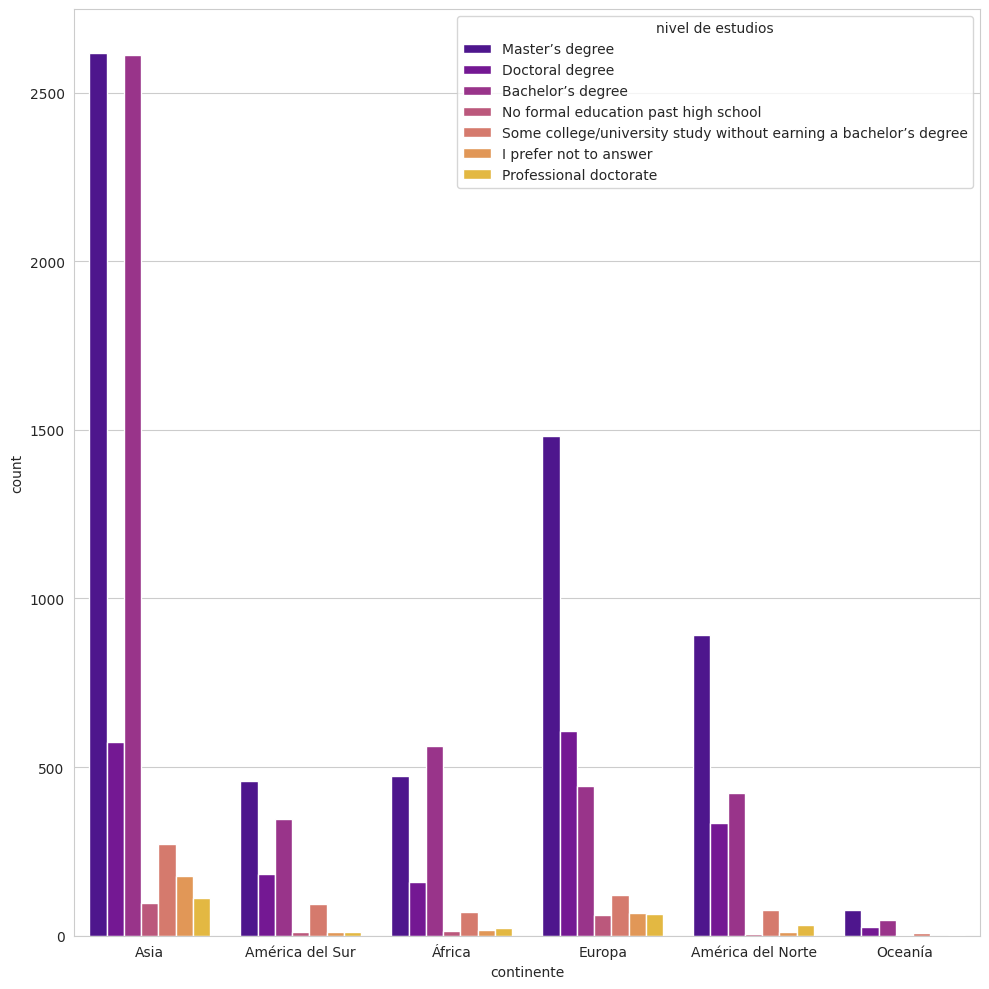

In [185]:
plt.figure(figsize=(10,10))

fig = sns.countplot(x = df_social["continente"], hue = df_social["nivel de estudios"], palette = 'plasma')
plt.tight_layout()

plt.show()

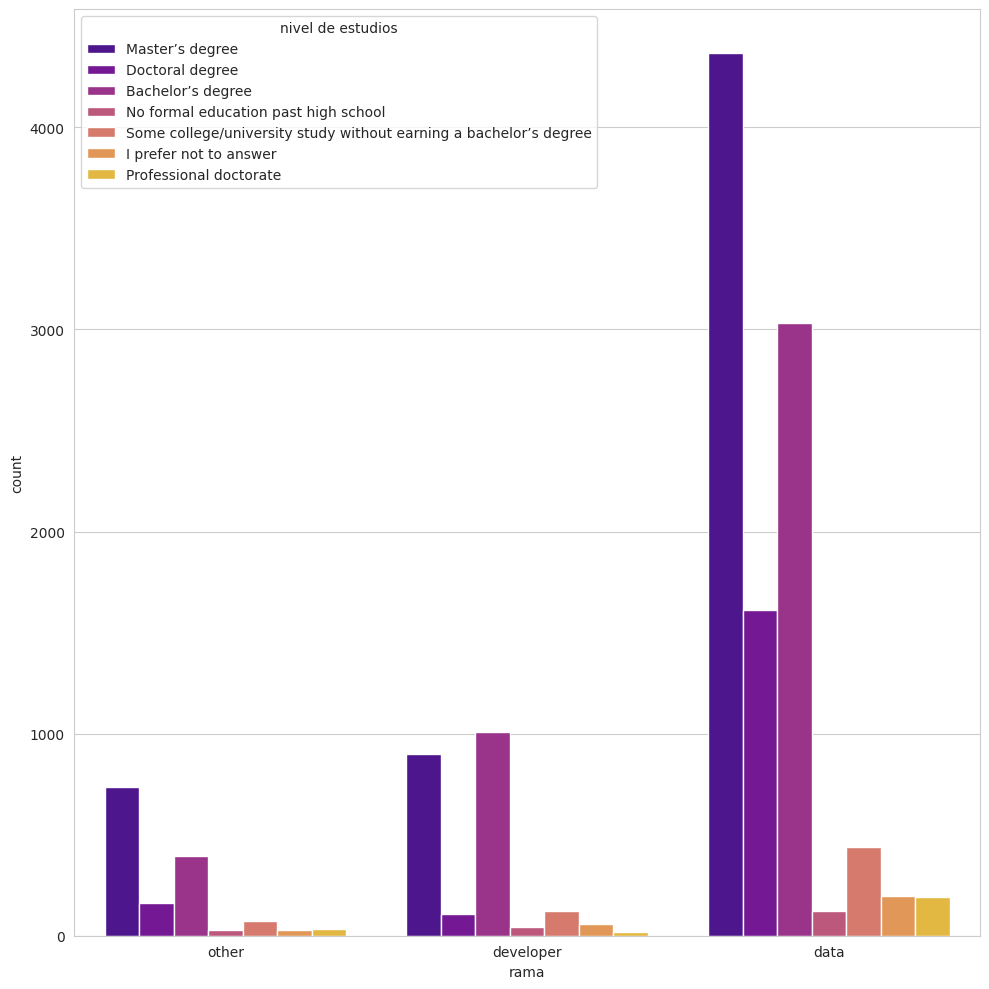

In [186]:
plt.figure(figsize=(10,10))

fig = sns.countplot(x = df_social["rama"], hue = df_social["nivel de estudios"], palette = 'plasma')
plt.tight_layout()

plt.show()

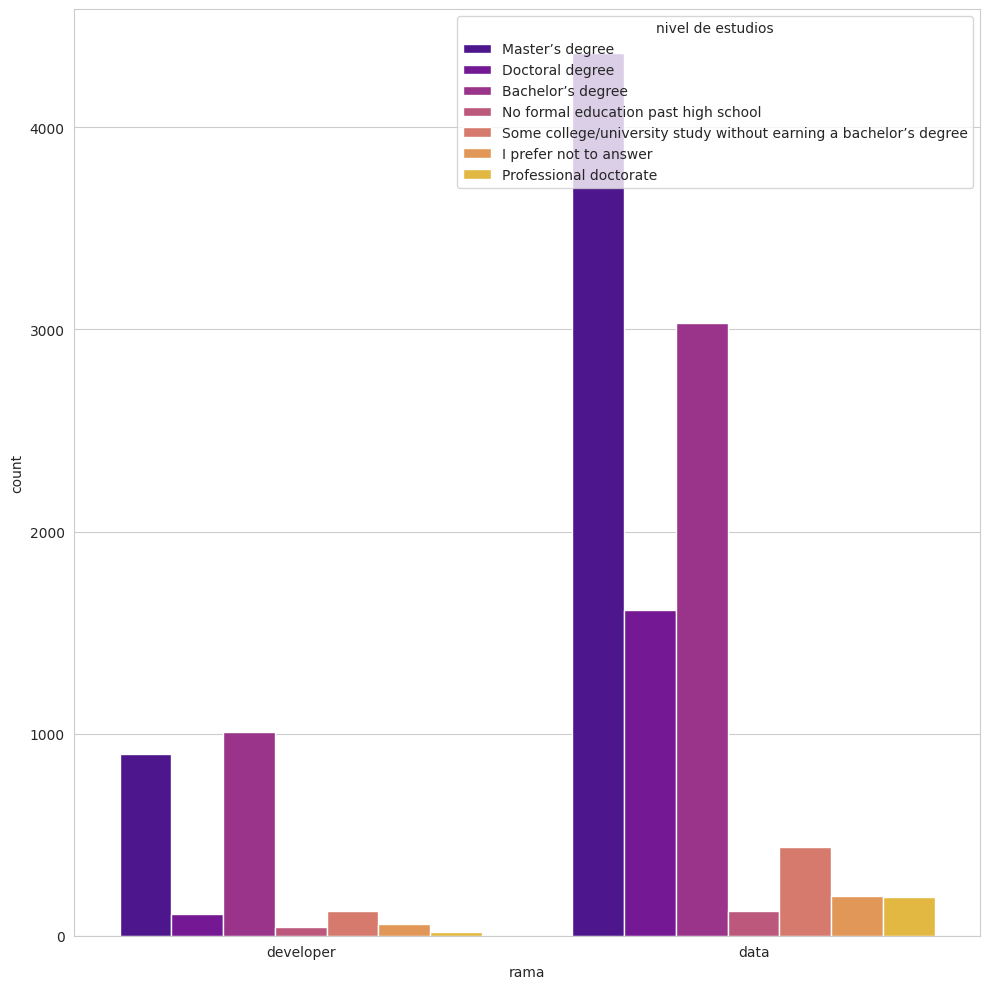

In [187]:
plt.figure(figsize=(10,10))

fig = sns.countplot(x = df_continente["rama"], hue = df_continente["nivel de estudios"], palette = 'plasma')
plt.tight_layout()

plt.show()

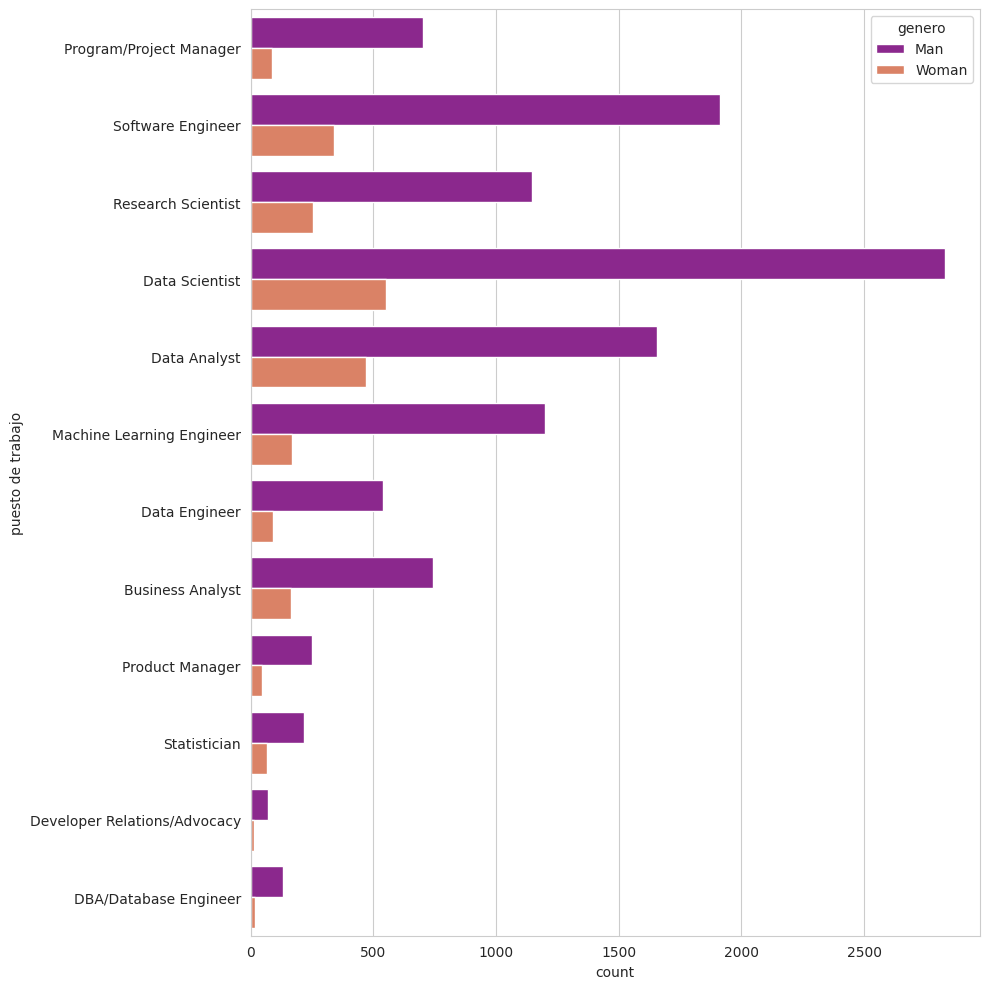

In [188]:
plt.figure(figsize=(10,10))

fig = sns.countplot(y = df_social["puesto de trabajo"], hue = df_social["genero"], palette = 'plasma')
plt.tight_layout()

plt.show()

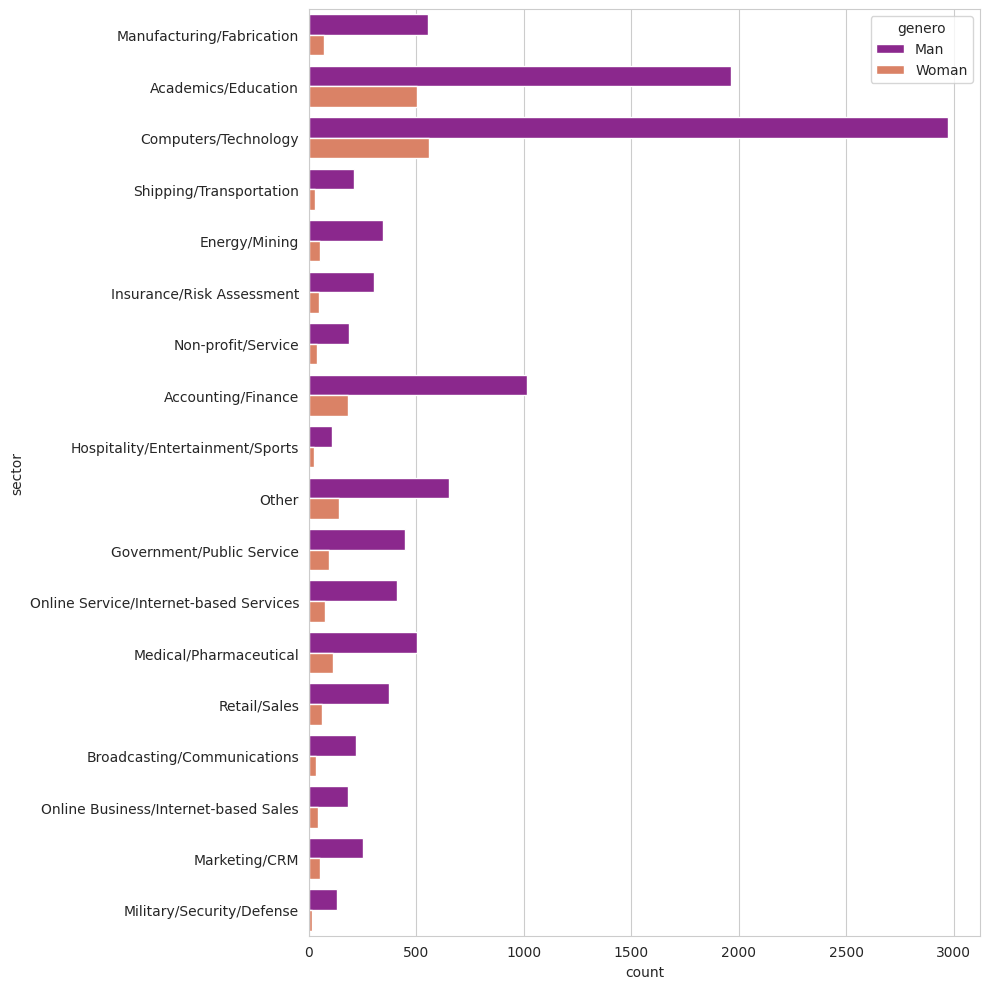

In [189]:
plt.figure(figsize=(10,10))

fig = sns.countplot(y = df_social["sector"], hue = df_social["genero"], palette = 'plasma')
plt.tight_layout()

plt.show()

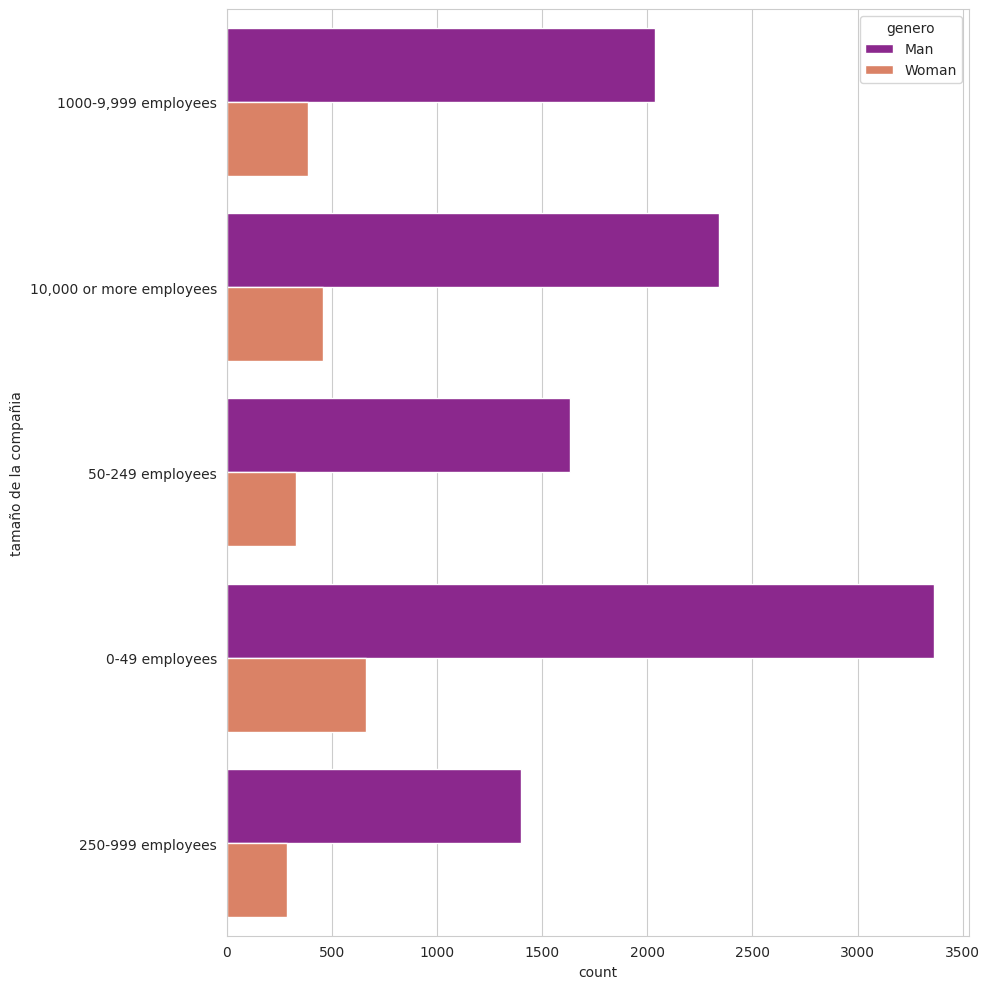

In [190]:
plt.figure(figsize=(10,10))

fig = sns.countplot(y = df_social["tamaño de la compañia"], hue = df_social["genero"], palette = 'plasma')
plt.tight_layout()

plt.show()

### GRÁFICO PUESTO DE TRABAJO - GENERO (USAR)

In [191]:
mujeres = df_social.groupby(['puesto de trabajo', 'genero']).count().unstack()['rama']['Woman'].sort_values(ascending=False)
hombres = df_social.groupby(['puesto de trabajo', 'genero']).count().unstack()['rama']['Man'].sort_values(ascending=False)

color = sns.color_palette('plasma')

plt.rcdefaults()

sns.set_style('whitegrid')

# fig,axes = plt.subplots(1,2,figsize=(10,10))

# plt.subplots_adjust(wspace=0.02)

# axes[0].invert_xaxis()
# axes[0].invert_yaxis()
axes[0].yaxis.tick_left()
axes[0].grid(None)


axes[0].set_xticks(range(1,int(hombres.values.max())+1))
axes[0].barh(y=mujeres.index,width=hombres.values,height=0.5,tick_label=mujeres.index,color= color)
axes[0].set_yticklabels(mujeres.index,fontsize=12)
axes[0].set_title('Mujeres',fontdict={'size':16})

axes[1].invert_yaxis()
axes[1].yaxis.tick_right()
axes[1].grid(None)


axes[1].set_xticks(range(1,int(hombres.values.max())+1))
axes[1].barh(y=hombres.index,width=hombres.values,height=0.5,tick_label=hombres.index,color=color)
axes[1].set_yticklabels(hombres.index,fontsize=12)
axes[1].set_title('Hombres', fontdict={'size':16})

plt.show()

In [192]:
df_tecnico.head()

,edad,pais,nivel de estudios,sector,años de experiencia,años de experiencia en ML,continente,Python,C++,SQL,MATLAB,Other,C,Java,Javascript,R,Swift,Bash,Julia
0,25-29,Poland,Master’s degree,Computers/Technology,3-5 years,Under 1 year,Europa,NaN,Utilizado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Viet Nam,Master’s degree,Academics/Education,1-3 years,1-2 years,Asia,Utilizado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22-24,Morocco,Master’s degree,Computers/Technology,1-3 years,Under 1 year,África,NaN,NaN,NaN,NaN,Utilizado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18-21,Bangladesh,Bachelor’s degree,Non-profit/Service,under 1 years,Under 1 year,Asia,Utilizado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18-21,India,Bachelor’s degree,Academics/Education,1-3 years,Under 1 year,Asia,NaN,Utilizado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### GRAFICA LENGUAJES - CONTINENTES (USAR)

En esta gráfica comparamos los lenguajes más usados (Python, SQL, C++ y MATLAB) por continentes. 

Lenguajes que se utilizan mas:

Asia --> Python , Matlab, C++ y SQL

Europa --> Python, Sql, Matlab, C++

Afica --> Matlab, Python, Sql, C++

America del Norte --> Python, (Sql, Matlab y C++ iguales)

America del Sur --> Sql, Python y Matlab iguales, y C++ no se usa.

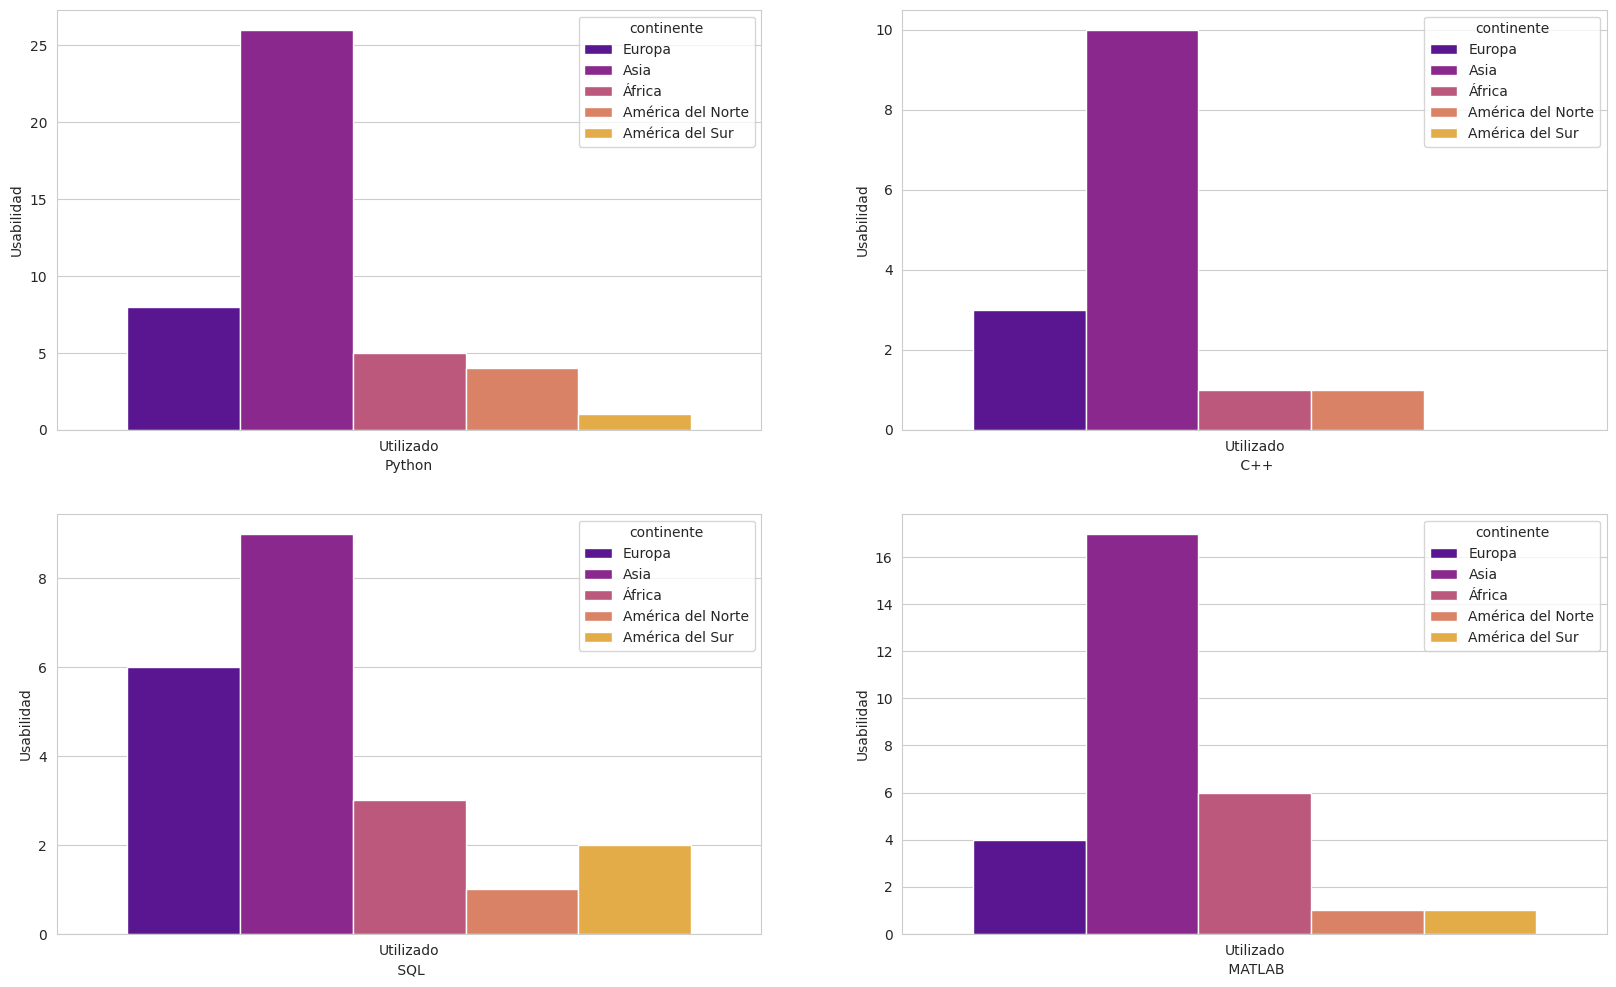

In [239]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
axes=axes.flat

for i, col in enumerate(["Python", ' C++', ' SQL',
       ' MATLAB']):
    sns.countplot(data=df_tecnico, x=df_tecnico[col], hue="continente", palette="plasma", ax=axes[i])
    axes[i].set_ylabel('Usabilidad');

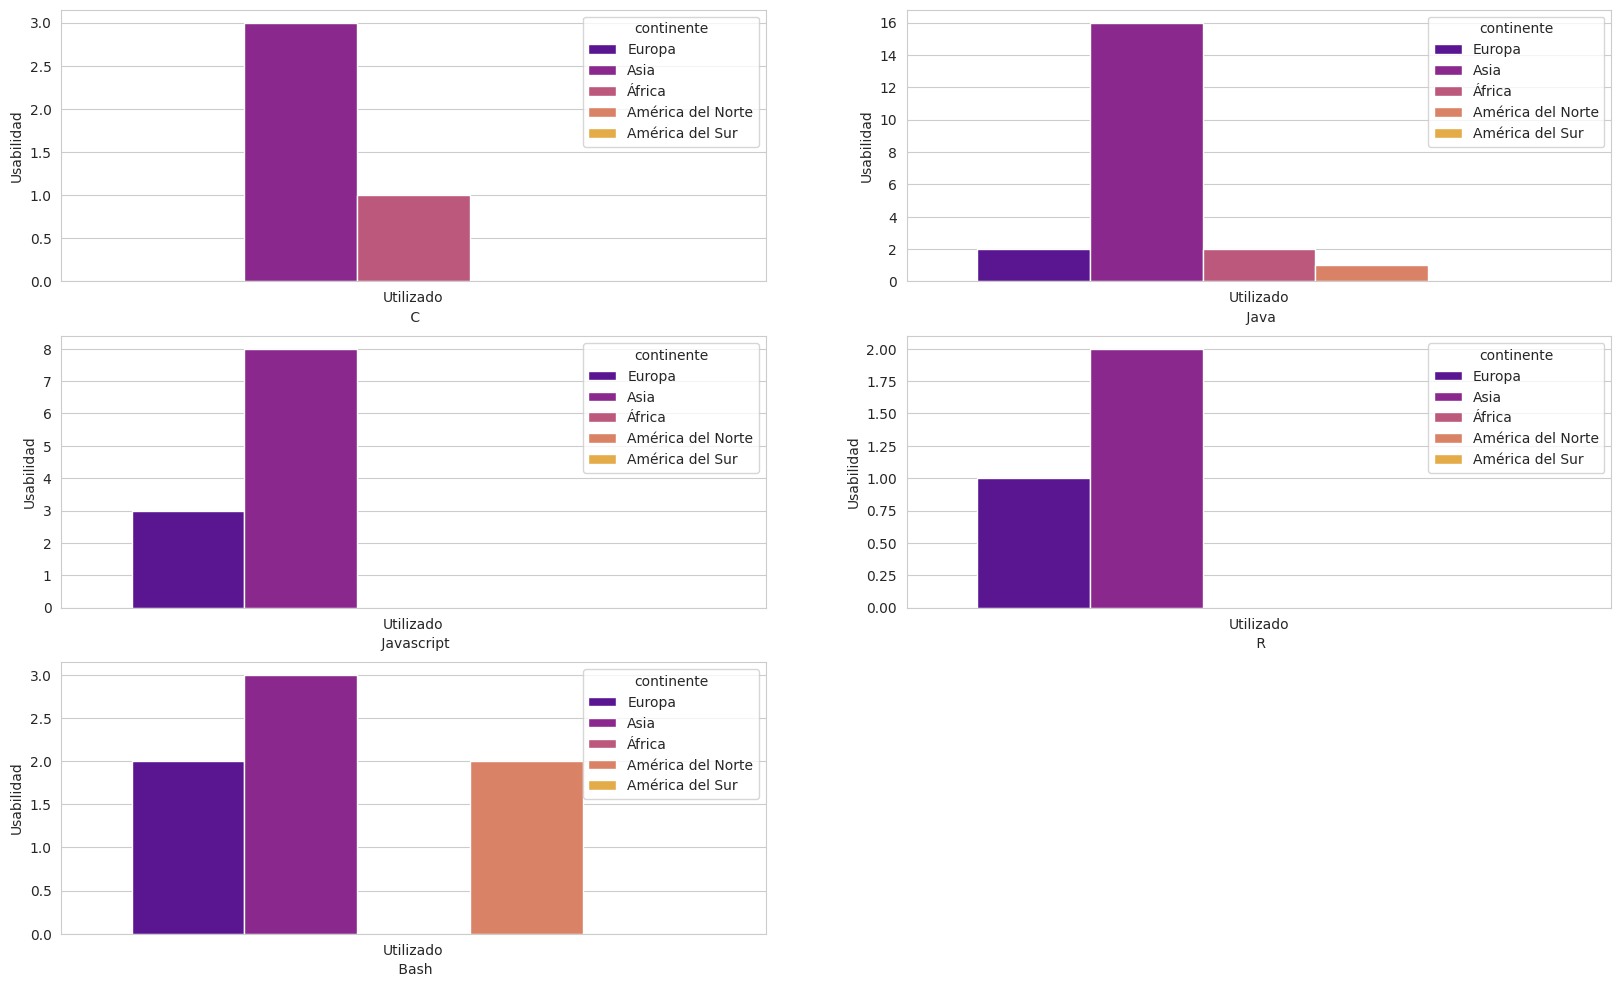

In [236]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,12))
axes=axes.flat


for i, col in enumerate([' C', ' Java', ' Javascript', ' R', ' Bash']):
    sns.countplot(data=df_tecnico, x=df_tecnico[col], hue="continente", palette="plasma", ax=axes[i])
    axes[i].set_ylabel('Usabilidad')

fig.delaxes(axes[-1]);


Relación por lenguajes y sector

In [247]:
df_social.head()

,genero,edad,pais,nivel de estudios,puesto de trabajo,sector,tamaño de la compañia,continente,rama
0,Man,50-54,Indonesia,Master’s degree,Program/Project Manager,Manufacturing/Fabrication,"1000-9,999 employees",Asia,other
1,Man,22-24,Pakistan,Master’s degree,Software Engineer,Academics/Education,"1000-9,999 employees",Asia,developer
2,Man,45-49,Mexico,Doctoral degree,Research Scientist,Academics/Education,"1000-9,999 employees",América del Sur,data
6,Man,30-34,India,Bachelor’s degree,Data Scientist,Computers/Technology,"10,000 or more employees",Asia,data
12,Man,45-49,Nigeria,Master’s degree,Program/Project Manager,Shipping/Transportation,"1000-9,999 employees",África,other


In [244]:
df_tecnico.head()

,edad,pais,nivel de estudios,sector,años de experiencia,años de experiencia en ML,continente,Python,C++,SQL,MATLAB,Other,C,Java,Javascript,R,Swift,Bash,Julia
0,25-29,Poland,Master’s degree,Computers/Technology,3-5 years,Under 1 year,Europa,NaN,Utilizado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Viet Nam,Master’s degree,Academics/Education,1-3 years,1-2 years,Asia,Utilizado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22-24,Morocco,Master’s degree,Computers/Technology,1-3 years,Under 1 year,África,NaN,NaN,NaN,NaN,Utilizado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18-21,Bangladesh,Bachelor’s degree,Non-profit/Service,under 1 years,Under 1 year,Asia,Utilizado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18-21,India,Bachelor’s degree,Academics/Education,1-3 years,Under 1 year,Asia,NaN,Utilizado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


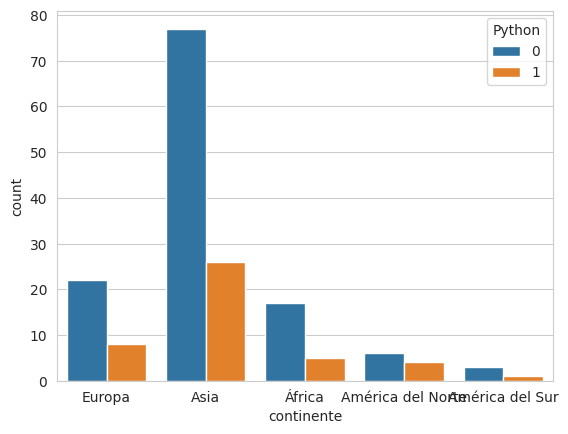

In [ ]:
fig = sns.countplot(data=df_tecnico, x="continente", hue="Python")

## AFRICA

In [ ]:
df_africa = df_social[(df_social["continente"].isin(["Africa"]) & (df_social['genero'].isin(["Woman"])))]

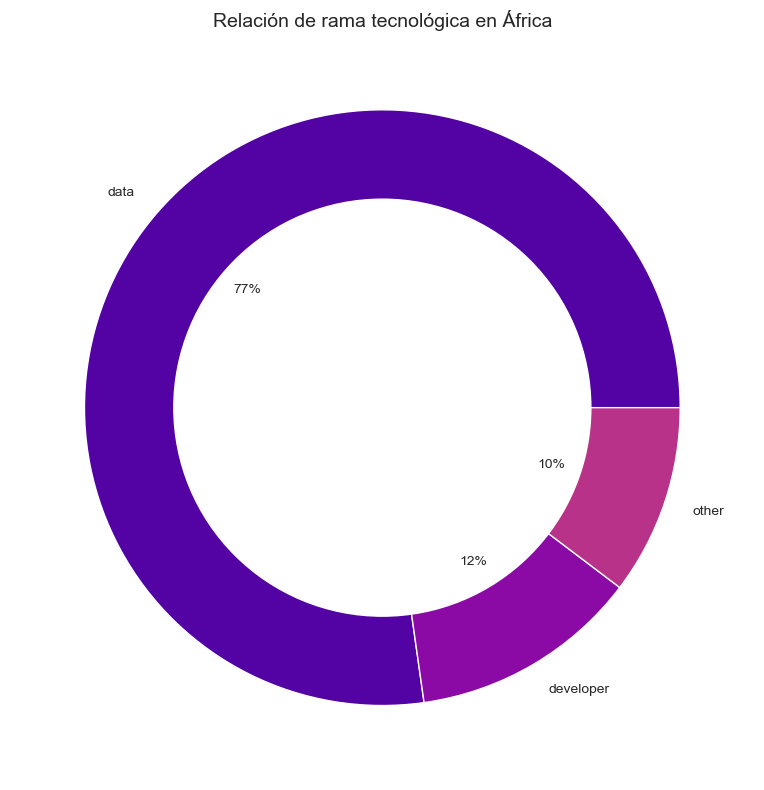

In [ ]:
plt.figure(figsize=(8,8))

color = sns.color_palette('plasma')

plt.pie(labels = df_africa["rama"].value_counts().keys(), x= df_africa["rama"].value_counts().values, autopct="%1.0f%%", colors = color)

circulo = plt.Circle((0,0), 0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo)

plt.title('Relación de rama tecnológica en África', fontsize = 14)

plt.tight_layout()
plt.show()

## AMERICA DEL NORTE

In [ ]:
df_norte = df_social[(df_social["continente"].isin(["América del Norte"]) & (df_social['genero'].isin(["Woman"])))]

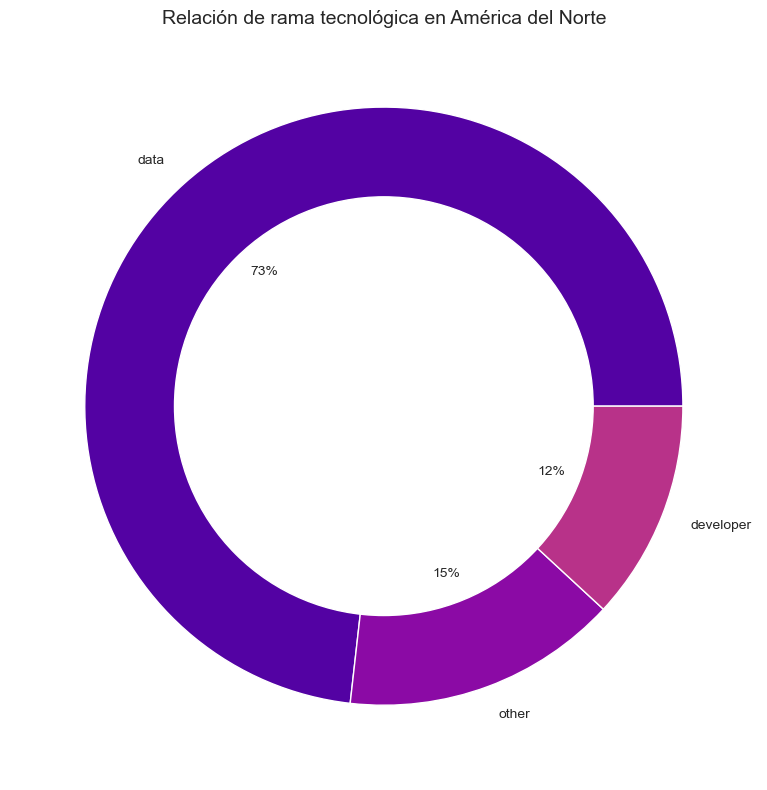

In [ ]:
plt.figure(figsize=(8,8))

color = sns.color_palette('plasma')

plt.pie(labels = df_norte["rama"].value_counts().keys(), x= df_norte["rama"].value_counts().values, autopct="%1.0f%%", colors = color)

circulo = plt.Circle((0,0), 0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo)

plt.title('Relación de rama tecnológica en América del Norte', fontsize = 14)

plt.tight_layout()
plt.show()

## AMÉRICA DEL SUD

In [ ]:
df_sur = df_social[(df_social["continente"].isin(["América del Sur"]) & (df_social['genero'].isin(["Woman"])))]

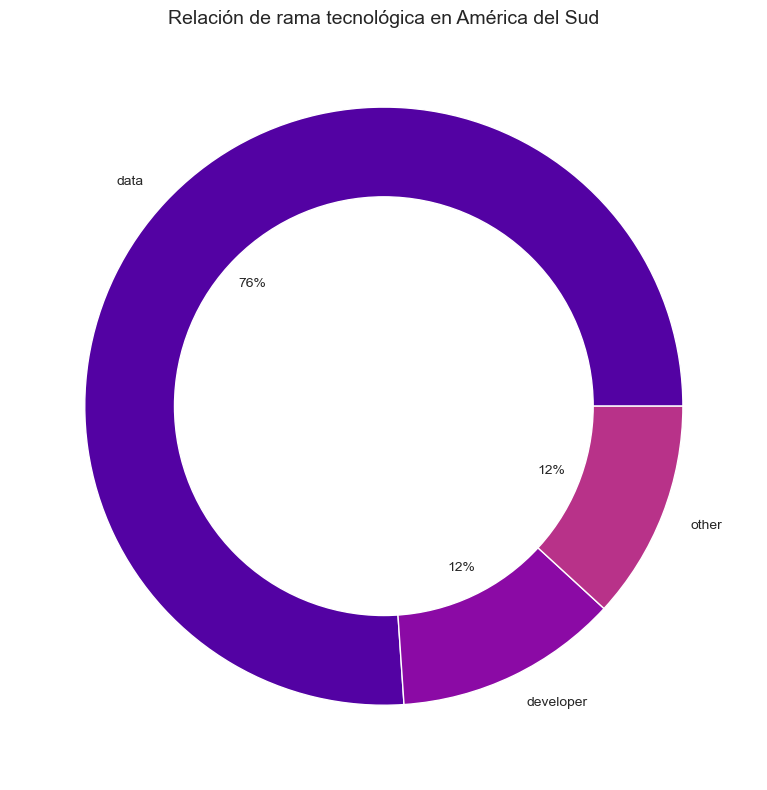

In [ ]:
plt.figure(figsize=(8,8))

color = sns.color_palette('plasma')

plt.pie(labels = df_sud["rama"].value_counts().keys(), x= df_sud["rama"].value_counts().values, autopct="%1.0f%%", colors = color)

circulo = plt.Circle((0,0), 0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo)

plt.title('Relación de rama tecnológica en América del Sud', fontsize = 14)

plt.tight_layout()
plt.show()

## ASIA

In [ ]:
df_asia = df_social[(df_social["continente"].isin(["Asia"]) & (df_social['genero'].isin(["Woman"])))]

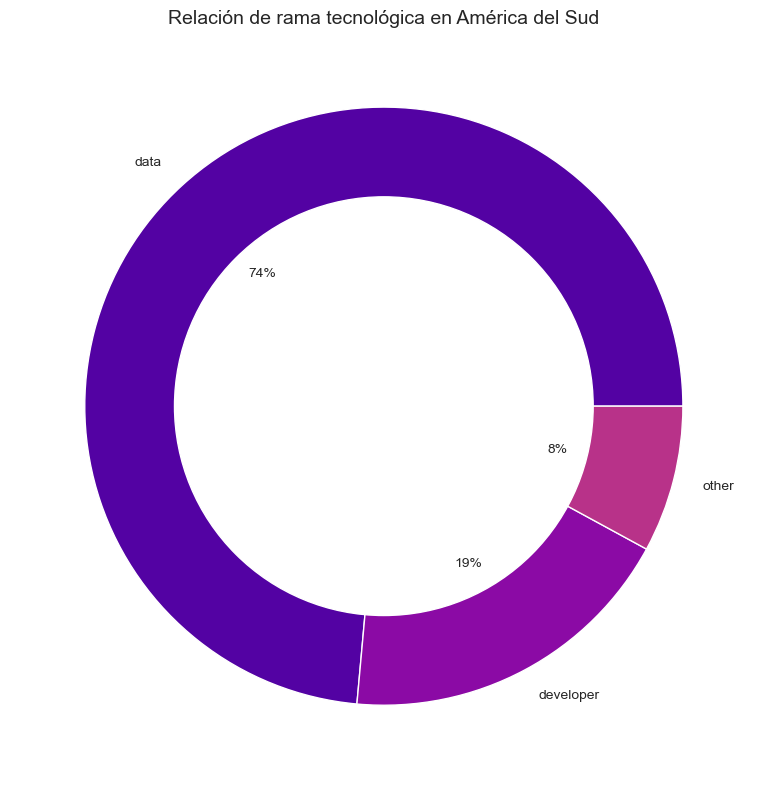

In [ ]:
plt.figure(figsize=(8,8))

color = sns.color_palette('plasma')

plt.pie(labels = df_asia["rama"].value_counts().keys(), x= df_asia["rama"].value_counts().values, autopct="%1.0f%%", colors = color)

circulo = plt.Circle((0,0), 0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo)

plt.title('Relación de rama tecnológica en América del Sud', fontsize = 14)

plt.tight_layout()
plt.show()

## EUROPA

In [ ]:
df_europa = df_social[(df_social["continente"].isin(["Europa"]) & (df_social['genero'].isin(["Woman"])))]

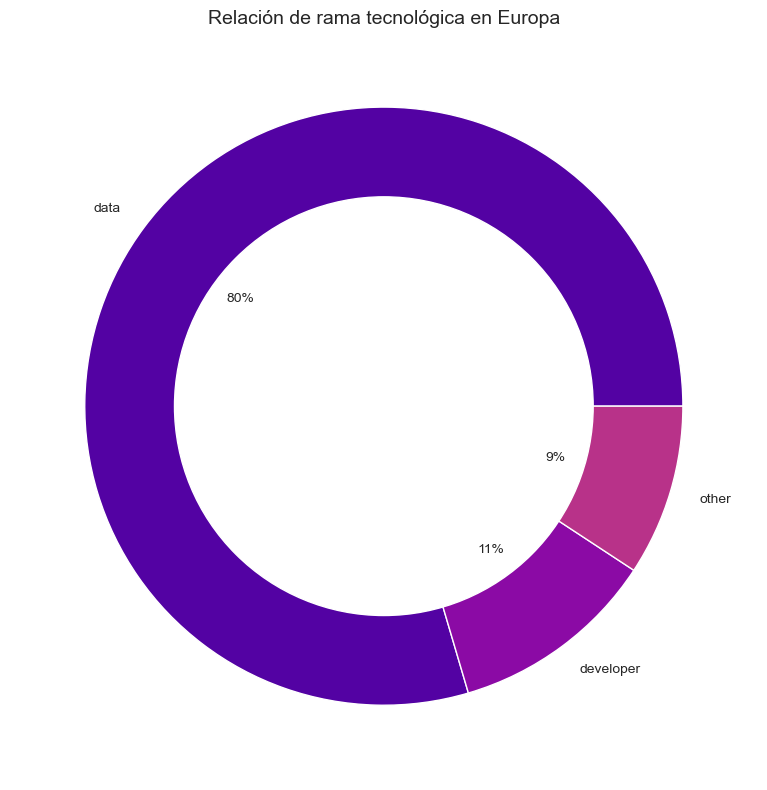

In [ ]:
plt.figure(figsize=(8,8))

color = sns.color_palette('plasma')

plt.pie(labels = df_europa["rama"].value_counts().keys(), x= df_europa["rama"].value_counts().values, autopct="%1.0f%%", colors = color)

circulo = plt.Circle((0,0), 0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo)

plt.title('Relación de rama tecnológica en Europa', fontsize = 14)

plt.tight_layout()
plt.show()

## OCEANÍA

In [ ]:
df_oceania = df_social[(df_social["continente"].isin(["Oceanía"]) & (df_social['genero'].isin(["Woman"])))]

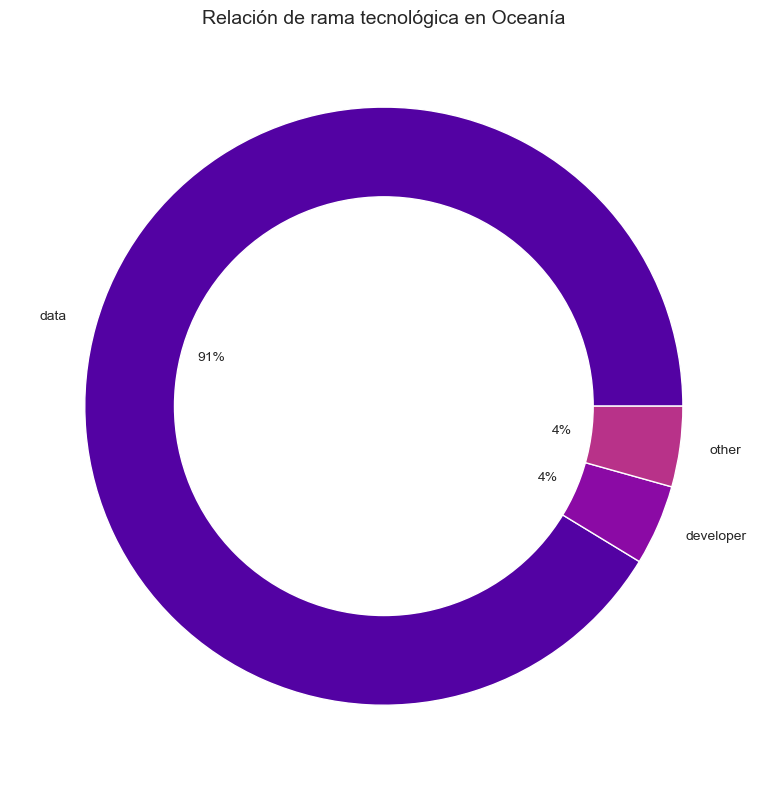

In [ ]:
plt.figure(figsize=(8,8))

color = sns.color_palette('plasma')

plt.pie(labels = df_oceania["rama"].value_counts().keys(), x= df_oceania["rama"].value_counts().values, autopct="%1.0f%%", colors = color)

circulo = plt.Circle((0,0), 0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo)

plt.title('Relación de rama tecnológica en Oceanía', fontsize = 14)

plt.tight_layout()
plt.show()

¿Qué relación hay entre la edad, los años de experiencia y el lenguaje que mas usan?

In [ ]:
df_tecnico.head(2)

,edad,pais,nivel de estudios,sector,años de experiencia,años de experiencia en ML,continente,Python,C++,SQL,MATLAB,Other,C,Java,Javascript,R,Swift,Bash,Julia
0,25-29,Poland,Master’s degree,Computers/Technology,3-5 years,Under 1 year,Europa,0,1,0,0,0,0,0,0,0,0,0,0
1,30-34,Viet Nam,Master’s degree,Academics/Education,1-3 years,1-2 years,Asia,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
df_tecnico["edad"].unique()

array(['25-29', '30-34', '22-24', '18-21', '40-44', '35-39', '45-49',
       '55-59', '50-54'], dtype=object)

In [ ]:
df_tecnico["edad_ok"] = df_tecnico["edad"].str.split("-", n=-1)

In [ ]:
def edad(edad_ok):
    return edad_ok[0]


In [ ]:
df_tecnico["edad_ok_ok"] = df_tecnico["edad_ok"].apply(edad)

In [ ]:
df_tecnico.head(2)

,edad,pais,nivel de estudios,sector,años de experiencia,años de experiencia en ML,continente,Python,C++,SQL,...,Other,C,Java,Javascript,R,Swift,Bash,Julia,edad_ok,edad_ok_ok
0,25-29,Poland,Master’s degree,Computers/Technology,3-5 years,Under 1 year,Europa,0,1,0,...,0,0,0,0,0,0,0,0,"[25, 29]",25
1,30-34,Viet Nam,Master’s degree,Academics/Education,1-3 years,1-2 years,Asia,1,0,0,...,0,0,0,0,0,0,0,0,"[30, 34]",30


In [ ]:
df_tecnico["edad_ok_ok"] = df_tecnico["edad_ok_ok"].astype("Int64")

In [ ]:
df_tecnico["edad_ok_ok"].dtype

Int64Dtype()

In [ ]:
df_tecnico["años de experiencia en ML"].unique()

array(['Under 1 year', '1-2 years', '2-3 years',
       'I do not use machine learning methods', '10-20 years',
       '3-4 years', '5-10 years', '4-5 years'], dtype=object)

In [ ]:
def experiencia(experiencia):
    if experiencia == "Under 1 year":
        return 1
    elif experiencia == "1-2 years":
        return 2
    elif experiencia == "2-3 years":
        return 3
    elif experiencia == "3-4 years":
        return 4
    elif experiencia == "5-10 years":
        return 10
    elif experiencia == "4-5 years":
        return 5
    elif experiencia == "10-20 years":
        return 20
    else:
        return 0
    

In [ ]:
df_tecnico["experiencia_ok"] = df_tecnico["años de experiencia en ML"].apply(experiencia)

In [ ]:
df_tecnico.head(2)

,edad,pais,nivel de estudios,sector,años de experiencia,años de experiencia en ML,continente,Python,C++,SQL,...,C,Java,Javascript,R,Swift,Bash,Julia,edad_ok,edad_ok_ok,experiencia_ok
0,25-29,Poland,Master’s degree,Computers/Technology,3-5 years,Under 1 year,Europa,0,1,0,...,0,0,0,0,0,0,0,"[25, 29]",25,1
1,30-34,Viet Nam,Master’s degree,Academics/Education,1-3 years,1-2 years,Asia,1,0,0,...,0,0,0,0,0,0,0,"[30, 34]",30,2


In [ ]:
df_tecnico["experiencia_ok"] = df_tecnico["experiencia_ok"].astype("Int64")

In [ ]:
df_tecnico["experiencia_ok"].dtype

Int64Dtype()

### GRÁFICA AÑOS EXPERIENCIA - EDAD - CONTINENTE

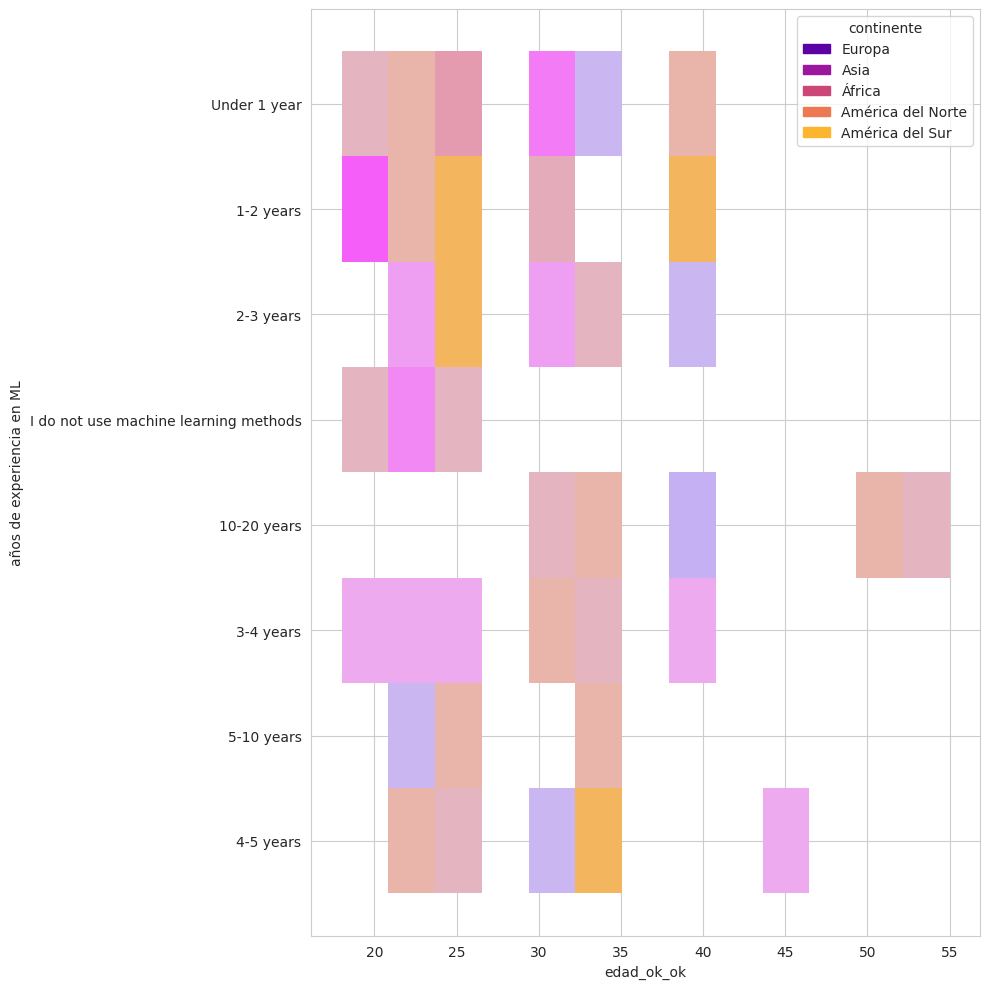

In [ ]:
plt.figure(figsize=(10,10))

fig = sns.histplot(data=df_tecnico, y="años de experiencia en ML", x="edad_ok_ok", hue="continente", palette= "plasma")
plt.tight_layout()

plt.show()

### GRÁFICA AÑOS EXPERIENCIA - EDAD - CONTINENTE

<AxesSubplot:xlabel='edad_ok_ok', ylabel='años de experiencia en ML'>

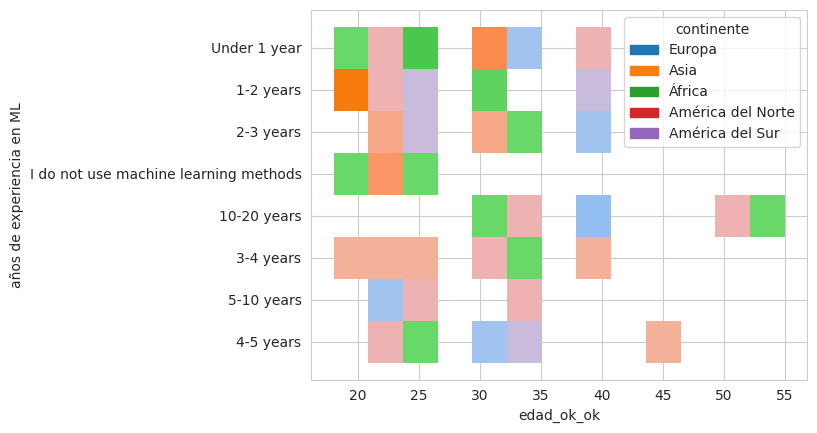

In [ ]:
sns.histplot(data=df_tecnico, y="años de experiencia en ML", x="edad_ok_ok", hue="continente")

### GRAFICA EDAD - EXPERIENCIA 

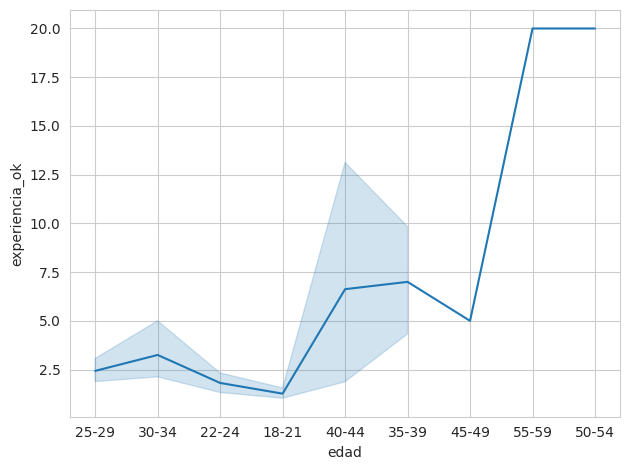

In [ ]:
fig = sns.lineplot(data=df_tecnico, x="edad", y="experiencia_ok")
plt.tight_layout()

plt.show()

### GRAFICA AÑOS DE EXPERIENCIA - EDAD

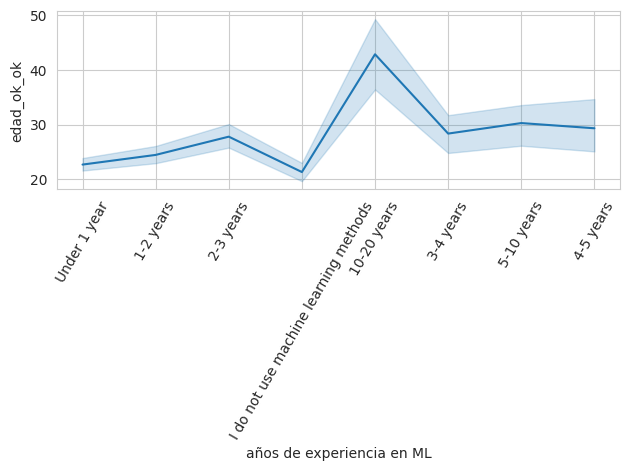

In [ ]:
sns.lineplot(data=df_tecnico, x="años de experiencia en ML", y="edad_ok_ok")
plt.xticks(rotation=60)
plt.tight_layout()

plt.show()

#### Propuesta hilo conductor Noe y Silvia

Intro --> Somos el equipo X y nuestro cliente es Onu mujeres y nos ha solicitado el análisis de una encuensta global a empleados del sector IT.

El objetivo es conocer la situación de la mujer en el sector para elaborar ONU mujeres unos programas de formación o desarrollo profesional en base al continente en el que se encuentran, es decir, adaptando dichos programas a las necesidades de cada continente.

Grafica introductoria:

1.- Puesto de trabajo - Género --> 

Relación entre el puesto de trabajo y el género.

-- Caso Especial de La India el 73% del número de trabajadores encuestados perteneciente al sector. [Gráfica de pie chart india] Hombres y mujeres en la india (problemas).

2.- Nivel de estudios - Contintente - Rama - --> 

En estas gráficas podemos ver en el eje de las x por un lado las ramas(data y developer) y por otro lado los distintos continentes, y en el eje y un conteo del nivel de estudios de los encuestados. 

Lo que observamos en la primera gráfica es que está relacionado tener estudios superiores para trabajar en las dos ramas (vemos claramente que predominan los estudios de doctorado y master para las dos). A raíz de este análisis podemos observar en la segunda gráfica que el nivel de estudios superiores predomina en los continentes Europa, Asia y America del Norte. Este hecho se da por la alfabetización y desarrollo que tienen estos tres continentes frente a los demás.

3.- lenguajes mas usado - continentes --> 

En esta gráfica comparamos los lenguajes más usados (Python, SQL, C++ y MATLAB) por continentes. 

Lenguajes que se utilizan mas:

Asia --> Python , Matlab, C++ y SQL

Europa --> Python, Sql, Matlab, C++

Afica --> Matlab, Python, Sql, C++

America del Norte --> Python, (Sql, Matlab y C++ iguales)

America del Sur --> Sql, Python y Matlab iguales, y C++ no se usa.

4.- Por determinar...


Conclusiones

.- Hombres y mujeres - puesto de trabajo: Vemos que hay muchos hombres en puestos de trabajo más elevados, mientras que las mujeres aparecen en las pymes. Diferencias generales de género entre los continentes (cultura, desarrollo...)

.- Data es la rama mas demandada por continente. EEUU y Japón llevan la delantera en cuestiones de bigdata.

.- Lenguajes - continente: Python no es el lenguaje mas usado en America del Sur y África, es decir, trabajan con lenguajes más antiguos ya que en su continente no tienen las herramientas tan actualizadas como en los demás continentes.



